## Fall 2020 CS4641 B Homework 2

## Instructor: Rodrigo Borela Valente

## Deadline: October 5th, Monday, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.

## Structure 

Homework 2 will have two components to it: The programming portion in this Jupyter notebook along with the theory questions provided in this notebook. The homework is worth a total of 150 points, where 50 of these are bonus points. The grading breakdown is as follows:
 
1. Programming (84+35 bonus): problems 1 (parts 1-4(A)),3 (parts 1-2), 4 (parts 1,3 and 4) 
2. Theory (11+15 bonus): problems 1.4(B), 2, 3.3 and 4.2

Points for each question are mentioned in their respective cells and the questions are present in this ipynb file.

## Instructions for the assignment

- We will be using Gradescope this semester for submission and grading of assignments.

- For the written (non-programming) part of the assignment
    - Your write up must be submitted in PDF form, you may use either Latex or markdown, whichever you prefer. We will not accept hand-written work.
    - Please make sure to start answering each question on a new page. It makes it more organized to map your answers on GradeScope. When submitting your assignment, you must correctly map pages of your PDF to each question/subquestion where they appear. Improperly mapped questions may not be graded correctly.

- Early Bird Special: If you can submit one of the coding assignment files (kmeans.py or gmm.py) by September 23rd, you get a bonus of 5 points for this assignment.

- Make your submission as follows:

    -Questions 1.4,2.1: Submit it in "A2 Written" assignment of gradescope in .pdf format

    -Question 2.2,3.3,4.2: Submit it in "A2 Bonus Written" assignment of gradescope in .pdf format

    - To create a pdf of your jupyter notebook, on the top left hand corner click on "File"->"Download as"->"HTML (.html)". As the HTML file on your system and open it (it will open up a browser). Now hit "CTRL + P" and save the file as a PDF. 

    -When uploading the pdf for the written portion of the assignment, please map the questions to pages where your solution begins (as was done for assignment 1).
    
    -Submit the programming solutions to their respective folders on gradescope as per the instructions given below

## Using the autograder

- You will submit your code (.py files) for the autograder in the following folders:

    - "A2 Programming":
        * kmeans.py
        * gmm.py
    - "A2 Bonus Programming":
        * cleandata.py
        * semisupervised_performance.py
    - "A2 Early Bird":
        * kmeans.py
        * gmm.py

- All you will have to do is to copy your implementations of the classes "Kmeans", "GMM", "CleanData", "SemiSupervised" onto the respective files. We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can help you identify which function might have an issue in your implementation, however, you are encouraged to debug your code locally on the Python notebook.

- **For the "HW2 - Non-programming" part, you will create a pdf (as was done for the theory portion of assignment 1) and submit it on Gradescope. The non-programming part corresponds to Q1.4, Q2, Q3.3 (both your response and the generated images with your implementation) and Q4.2.**

## 0 Set up
This notebook is tested under [python 3.6.8](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)

Please implement the functions that have "raise NotImplementedError", and after you finish the coding, please delete or comment "raise NotImplementedError".

In [162]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

# Load image
import imageio

Version information
python: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
matplotlib: 2.2.5
numpy: 1.19.1


## 1. KMeans Clustering [5 + 30 + 10 + 5 = 50 pts]




KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K clusters: $S = \{S_1, S_2, \ldots, S_K\}$ and each cluster has $\mu_i$ as its center.


### 1.1 pairwise distance [5pts]

In this section, you are asked to implement pairwise_dist function.

Given $X \in \mathbb{R}^{N x D}$ and $Y \in \mathbb{R}^{M x D}$, obtain the pairwise distance matrix $dist \in \mathbb{R}^{N x M}$ using the euclidean distance metric, where $dist_{i, j} = ||X_i - Y_j||_2$.  

DO NOT USE FOR LOOP in your implementation -- they are slow and will make your code too slow to pass our grader.  Use array broadcasting instead.

### 1.2 KMeans Implementation [30pts]

In this section, you are asked to implement _init_centers [5pts], _update_assignment [10pts], _update_centers [10pts] and _get_loss function [5pts].

For the function signature, please see the corresponding doc strings.

### 1.3 Find the optimal number of clusters [10 pts]

In this section, you are asked to implement find_optimal_num_clusters function.
You will now use the elbow method to find the optimal number of clusters.
After completing your implementation of class kmeans, copy this code block and paste it on kmeans.py

In [163]:
class KMeans(object):
    
    def __init__(self): #No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [5 pts]
        np.random.seed(1)
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
                """
        return np.sqrt(np.sum(np.square(x)[:,np.newaxis,:], axis=2) - 2 * x.dot(np.transpose(y)) + np.sum(np.square(y), axis=1))

    def _init_centers(self, points, K, **kwargs): # [5 pts]
        np.random.seed(1)
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        return points[np.random.choice(points.shape[0], K, replace=False)]

    def _update_assignment(self, centers, points): # [10 pts]
        np.random.seed(1)
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
        return np.argmin(self.pairwise_dist(centers, points), axis=0)
    
    def _update_centers(self, old_centers, cluster_idx, points): # [10 pts]
        np.random.seed(1)
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        K = old_centers.shape[0]
        centers = np.empty(old_centers.shape)
        for x in range(K):
            centers[x] = np.mean(points[cluster_idx == x], axis=0)
        return centers

    def _get_loss(self, centers, cluster_idx, points): # [5 pts]
        np.random.seed(1)
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """    
        return np.sum(np.square(self.pairwise_dist(centers, points)[cluster_idx, np.arange(len(cluster_idx))]))
        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            assignments = self._update_assignment(centers, points)
            centers = self._update_centers(centers, assignments, points)
            loss = self._get_loss(centers, assignments, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return assignments, centers, loss
    
    def find_optimal_num_clusters(self, data, max_K=15): # [10 pts]
        np.random.seed(1)
        """Plots loss values for different number of clusters in K-Means
        
        Args:
            image: input image of shape(H, W, 3)
            max_K: number of clusters
        Return:
            losses: a list, which includes the loss values for different number of clusters in K-Means
            Plot loss values against number of clusters
        """
        losses = np.empty(max_K)
        _, img = data.shape
        flat_img = np.reshape(data, [-1, img]).astype(np.float32)
        for i in range(max_K):
            _, _, losses[i] = KMeans()(flat_img, i+1)
        plt.plot(np.arange(max_K) + 1, losses)
        plt.show()
        return losses




### 1.4 COVID19 Clustering [5 pts (4 for (A) and 1 for (B))]

(A) In this section, we are going to use our Kmeans algorithm to cluster the COVID19 dataset. You will run Kmeans on two datasets.Both the datasets are contain 187 datapoints, each datapoint representing a country. The size of the first dataset is $187\times 3$, which includes all the number of confirmed cases and deathtoll for COVID19 till May 20th, 2020. The size of the second dataset is $187\times 5$, which includes all the number of confirmed cases, deathtoll, recovered cases as well as coordinates for COVID19 till Aug 31st, 2020. 

The three columns of dataset $1$ are:
* Countries
* The number of confirmed cases
* Death toll

The five columns of dataset $2$ are:
* Countries
* The number of recovered cases
* The number of confirmed cases
* Death toll
* Latitude
* Longitude

<font color='green'> We are going to do the clustering task for the two datasets, the first two runs is for all the columns of both the datasets, the third run is taking only the confirmed cases and deathtoll as features. The reason we have countries in our dataset is for you to associate the names of countries to each cluster. </font>

(B) What is your personal takeaway after running the algorithm for datasets with different features, different number of centers etc.? 

In [164]:
# Helper function for checking the implementation of pairwise_distance fucntion. Please DO NOT change this function
# TEST CASE
x = np.random.randn(2, 2)
y = np.random.randn(3, 2)

print("*** Expected Answer ***")
print("""==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]""")


print("\n*** My Answer ***")
print("==x==")
print(x)
print("==y==")
print(y)
print("==dist==")
print(KMeans().pairwise_dist(x, y))

*** Expected Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]

*** My Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]


In [165]:
#Helper function for reading the .csv file.You don't need to change this function   
def read_file():
    data = np.zeros((187,2))
    data1 = np.zeros((187,5))
    countries = []
    cnt=0
    with open(r'covid19_recovered_confirmed_deaths_082020.csv', 'r') as f:
        for line in f:
            country,recovered,confirmed,death,lat,lon = line.split(',')
            data1[cnt,:]=[recovered,confirmed,death,lat,lon]
            countries.append(country)
            cnt+=1
    cnt=0
    with open(r'covid19_confirmed_deaths_052020.csv', 'r') as f:
        for line in f:
            country, confirmed,death = line.split(',')
            data[cnt,:]=[confirmed,death]
            countries.append(country)
            cnt+=1
    return data,data1,countries

In [166]:
# Helper function for visualizing cluster results. You don't have to modify it
# If there are more than ten countries in the cluster, we are only going to show the first 10 countries as examples.
def visualize (cluster_idx,centers,K,name_list,flag=0):
   
    num_list = [np.sum(np.array(cluster_idx) == i) for i in range(0,K)]

    x =list(range(len(num_list)))
    total_width, n = 0.8, 2
    width = total_width / n
    plt.figure(figsize=(10,5))
    plt.title('Visualization for '+ str(K) + ' clusters', fontdict = {'fontsize' : 18})
    plt.bar(x, num_list, width=width, label='number',tick_label = name_list, fc = 'orchid')

    plt.legend()
    for i in range(0, K):
        if flag == 0:     
            print('{0}: Average confirmed: {1:.2f}, Average Deathtoll: {2:.2f}.'.format(name_list[i], centers[i][0], centers[i][1])) 
        if flag == 1:
            print('{0}: Average recovered: {1:.2f}, Average confirmed: {2:.2f}, Average Deathtoll: {3:.2f}.'.format(name_list[i], centers[i][0], centers[i][1], centers[i][2])) 
        data = list(np.array(countries)[np.where(cluster_idx==i)])
        print('Total number of countries in {0}: {1}'.format(name_list[i], len(data)))
        if len(data) > 10:
            data = data[:10]
        print(('{}   '*len(data)).format(*data))
        print('\n')
    
    plt.show()

Cluster 1: Average confirmed: 18495.95, Average Deathtoll: 1260.88.
Total number of countries in Cluster 1: 186
Afghanistan   Albania   Algeria   Andorra   Angola   Antigua and Barbuda   Argentina   Armenia   Australia   Austria   


Cluster 2: Average confirmed: 1551853.00, Average Deathtoll: 93439.00.
Total number of countries in Cluster 2: 1
US   




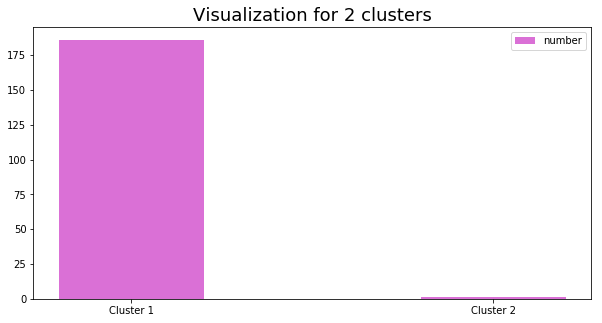

Cluster 1: Average confirmed: 238005.43, Average Deathtoll: 21997.29.
Total number of countries in Cluster 1: 7
Brazil   France   Germany   Italy   Russia   Spain   United Kingdom   


Cluster 2: Average confirmed: 1551853.00, Average Deathtoll: 93439.00.
Total number of countries in Cluster 2: 1
US   


Cluster 3: Average confirmed: 38857.69, Average Deathtoll: 2196.06.
Total number of countries in Cluster 3: 16
Bangladesh   Belarus   Belgium   Chile   Ecuador   Ireland   Mexico   Netherlands   Pakistan   Portugal   


Cluster 4: Average confirmed: 3126.38, Average Deathtoll: 106.68.
Total number of countries in Cluster 4: 157
Afghanistan   Albania   Algeria   Andorra   Angola   Antigua and Barbuda   Argentina   Armenia   Australia   Austria   


Cluster 5: Average confirmed: 110274.17, Average Deathtoll: 4776.17.
Total number of countries in Cluster 5: 6
Canada   China   India   Iran   Peru   Turkey   




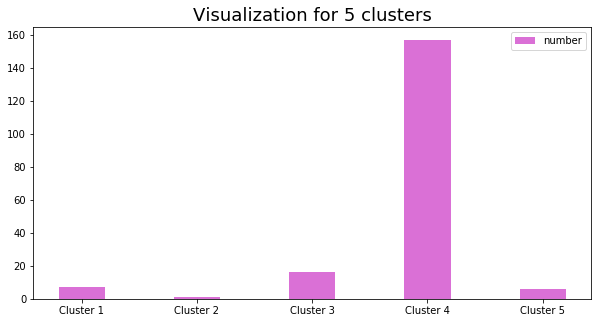

In [150]:
# Helper function for running the algorithm for K=2 and K=5 on dataset 1. You don't have to modify it
name_list0 = ['Cluster 1','Cluster 2']
name_list1 = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
name_list2 = ['Cluster 1','Cluster 2','Cluster 3']

data, data1, countries = read_file()
cluster_idx2, centers2, loss2 = KMeans()(data, 2)
visualize(cluster_idx2, centers2, 2, name_list0)

cluster_idx5, centers5, loss5 = KMeans()(data, 5)
visualize(cluster_idx5, centers5, 5, name_list1)

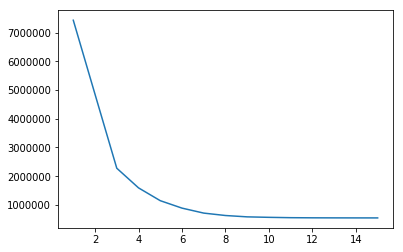

array([7434367.7420582 , 4852386.66533115, 2276962.03134415,
       1592353.77568804, 1145999.12358172,  886437.16895716,
        712883.52615077,  628874.04067566,  581848.96712448,
        565261.31570247,  553220.81680461,  548550.30293357,
        546688.05497469,  545499.81498079,  545074.20034259])

In [151]:
# Helper function for visualizing elbow method result on dataset 1. You don't have to modify it
KMeans().find_optimal_num_clusters(data)

Cluster 1: Average recovered: 2704795.29, Average confirmed: 4429822.62, Average Deathtoll: 227358.44.
Total number of countries in Cluster 1: 184
Afghanistan   Albania   Algeria   Andorra   Angola   Antigua and Barbuda   Argentina   Armenia   Australia   Austria   


Cluster 2: Average recovered: 114476468.33, Average confirmed: 242568774.00, Average Deathtoll: 9048283.00.
Total number of countries in Cluster 2: 3
Brazil   India   US   




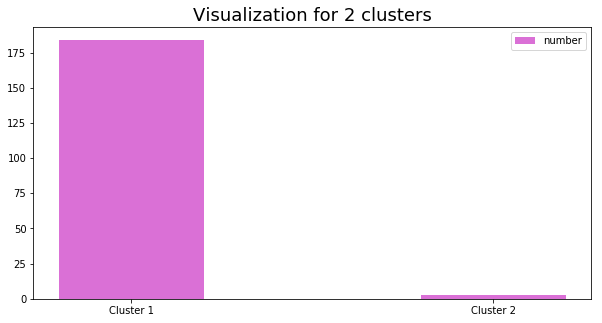

Cluster 1: Average recovered: 67424447.00, Average confirmed: 101308266.00, Average Deathtoll: 1955657.50.
Total number of countries in Cluster 1: 2
India   Russia   


Cluster 2: Average recovered: 129005629.50, Average confirmed: 300667433.00, Average Deathtoll: 12187388.50.
Total number of countries in Cluster 2: 2
Brazil   US   


Cluster 3: Average recovered: 4132179.44, Average confirmed: 7527867.22, Average Deathtoll: 295142.63.
Total number of countries in Cluster 3: 27
Argentina   Bangladesh   Belarus   Belgium   Bolivia   Canada   Dominican Republic   Ecuador   Egypt   Indonesia   


Cluster 4: Average recovered: 424307.55, Average confirmed: 672968.22, Average Deathtoll: 17542.06.
Total number of countries in Cluster 4: 141
Afghanistan   Albania   Algeria   Andorra   Angola   Antigua and Barbuda   Armenia   Australia   Austria   Azerbaijan   


Cluster 5: Average recovered: 18457025.07, Average confirmed: 29380090.20, Average Deathtoll: 2016695.20.
Total number of countries 

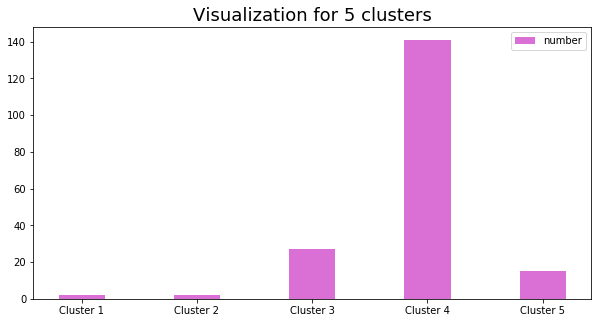

In [167]:
# Helper function for running the algorithm for K=2 and K=5 on dataset 2. You don't have to modify it
cluster_idx2, centers2, loss2 = KMeans()(data1, 2)
visualize(cluster_idx2, centers2, 2, name_list0,flag=1)

cluster_idx5, centers5, loss5 = KMeans()(data1, 5)
visualize(cluster_idx5, centers5, 5, name_list1,flag=1)

/Users/amansingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


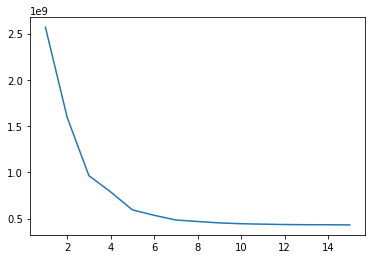

array([2.56767604e+09, 1.59435503e+09, 9.64166445e+08, 7.88594592e+08,
       5.94629775e+08, 5.35878676e+08, 4.85215078e+08, 4.69007084e+08,
       4.53593068e+08, 4.44839835e+08, 4.40151869e+08, 4.36293602e+08,
       4.34095490e+08, 4.33648310e+08, 4.31962484e+08])

In [144]:
# Helper function for visualizing elbow method result on dataset2. You don't have to modify it
KMeans().find_optimal_num_clusters(data1)

Cluster 1: Average confirmed: 196511.09, Average Deathtoll: 15622.18.
Total number of countries in Cluster 1: 11
Brazil   France   Germany   India   Iran   Italy   Peru   Russia   Spain   Turkey   


Cluster 2: Average confirmed: 1551853.00, Average Deathtoll: 93439.00.
Total number of countries in Cluster 2: 1
US   


Cluster 3: Average confirmed: 7306.43, Average Deathtoll: 358.17.
Total number of countries in Cluster 3: 175
Afghanistan   Albania   Algeria   Andorra   Angola   Antigua and Barbuda   Argentina   Armenia   Australia   Austria   




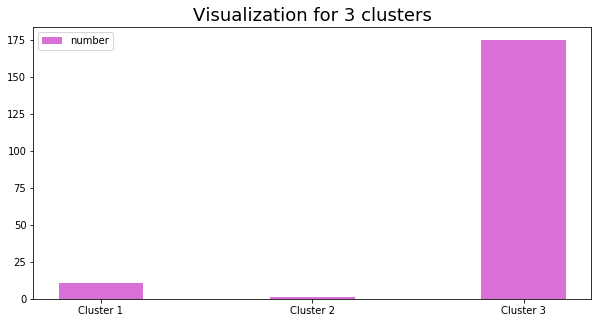

Cluster 1: Average confirmed: 39135219.81, Average Deathtoll: 2083109.62.
Total number of countries in Cluster 1: 16
Chile   Colombia   France   Germany   India   Iran   Italy   Mexico   Pakistan   Peru   


Cluster 2: Average confirmed: 300667433.00, Average Deathtoll: 12187388.50.
Total number of countries in Cluster 2: 2
Brazil   US   


Cluster 3: Average confirmed: 1865652.67, Average Deathtoll: 66711.66.
Total number of countries in Cluster 3: 169
Afghanistan   Albania   Algeria   Andorra   Angola   Antigua and Barbuda   Argentina   Armenia   Australia   Austria   




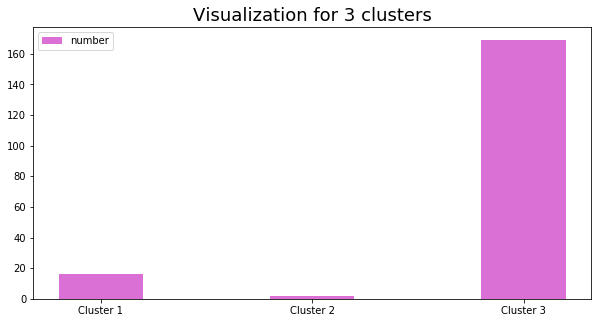

In [145]:
# Helper function for running the algorithm for K=3 on both the datasets only taking the confirmed cases and deathtoll as features. You don't have to modify it
cluster_idx2, centers2, loss2 = KMeans()(data, 3)
visualize(cluster_idx2, centers2, 3, name_list2)
cluster_idx5, centers5, loss5 = KMeans()(data1[:,1:3], 3)
visualize(cluster_idx5, centers5, 3, name_list2)

## 2 EM algorithm [10 pts + 10 bonus pts]

### 2.1 Performing EM Algorithm [10 pts]
2.1.1.

Suppose we are given a sample $\{x_i\}_{i=1,\dots,N}\subset\mathbb{R}$ and we know that each point is drawn randomly from a set of distributions defined by a hidden latent variable $Z$. This hidden variable follows the continuous Gamma distribution; that is,

$$ Z \sim Gamma(\eta;\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\eta^{\alpha-1}e^{-\beta \eta} $$

where $\Gamma(\cdot)$ is the Gamma function. While we cannot directly compute the probabilities $p(x_i)$ of our data points, we can introduce $Z$ to obtain a well-structured distribution, defined by a set of parameters $\Theta=\{\mu,\lambda,\nu\}$, as follows

$$ p(x;\Theta) = \int p(x|Z=\eta;\mu,\lambda)p(Z=\eta;\nu)d\eta = \int\mathcal{N}\left(x;\mu,(\lambda\eta)^{-1}\right)Gamma\left(\eta;\frac{\nu}{2},\frac{\nu}{2}\right)d\eta $$

where $\mathcal{N}(\cdot;\mu,\lambda)$ denotes a Gaussian distribution with mean $\mu$ and variance $\lambda$. Compute the log-likelihood $\ell(\Theta)$. 

2.1.2 (EM and K-means)

An interesting observation is that the K-means procedure can be viewed as a special case of the EM algorithm. In particular, consider the problem of $K$ multivariate Gaussian latent variables, each occuring with equal probability $\frac{1}{K}$. Moreover, suppose each one has mean $\mu_k$ and they all have same covariance matrix $\epsilon I$, where $\epsilon>0$ is some positive real number and $I$ is the identity matrix. Show that as $\epsilon\to0$, the EM algorithm in this setting is equivalent to minimizing the K-means objective

$$ J(r,\mu) = \sum_n\sum_k r_{nk}||x_n-\mu_k||^2 $$

where $r$ represents the cluster assignments, i.e., $r_{nk}=1$ if $x_n$ belongs to the $k$-th cluster and $r_{nk} = 0$ otherwise, and $\mu$ represents the cluster means.

Recall that EM can be viewed as an optimization of the following objective function:

$$ J(q,\theta) = \sum_n \sum_k q_n(k)\log\frac{p(x_n,k;\theta)}{q_n(k)} $$

where $q$ comprises a probability distribution $q_n$ over the latent variables ($q_n$ assigns probability $q_n(k)$ to the $k$-th variable) for each data point $x_n$. The E-step maximizes $J(\cdot,\theta)$ over all such distributions for a fixed $\theta$ and the M-step maximizes $J(q,\cdot)$ over the parameter space for a fixed $q$.

## Answer:

### 2.2 EM Algorithm in Coin Toss problem [10 points Bonus]

We have done 1-D head and transport model. Next step is to extend it to 2-D model and reaction term will be included. 

Suppose we have a bunch of coins $C$ consisting two kinds of coins. Mathematically, it obeys a mixed Bernoulli distribution:
$$X\sim F = \pi F_{1}+(1-\pi) F_{2}$$
where $\pi \in [0,1]$, and $F_{1}=Ber(p_{1})$, $F_{2}=Ber(p_{2})$. That is to say, each coin belongs to $F_{1}$ or $F_{2}$. Here $Ber(p)$ means the coin gives 1 (head) with probability $p$ and gives 0 (tail) with probability $1-p$.
We initialized parameters $p_{1}=\frac{1}{3}$, $p_{2}=\frac{2}{3}$, $\pi=\frac{1}{2}$. Now, we draw 4 coins $X_{1}$, $X_{2}$, $X_{3}$, $X_{4}$ independently from $C$ and have 3 independent trials for each of them. The result shows:

$$
\begin{array}{|c|c|c|c|c|}\hline Coins & X_{1} & X_{2} & X_{3}& X_{4}   \\ \hline Trial 1 & 1 & 0 & 0& 1   \\ \hline Trial 2 & 1 & 1 & 1& 0   \\ \hline Trial 3 & 0 & 1 & 0 & 1  \\\hline\end{array}
$$


2.2.1. Use EM algorithm for one step, we update $F = F(p_{1}=\frac{1}{3}$, $p_{2}=\frac{2}{3}$,  $\pi=\frac{1}{2}$),  to $F^{'}(p_{1}^{'},p_{2}^{'},\pi^{'})$. Write down your EM algorithm and show the value of $p_{1}^{'},p_{2}^{'},\pi^{'}$. 

(**Hint**: $\theta^{new}=argmax_{\theta}\sum_{Z}p(Z|X,\theta^{old})\ln p(X,Z|\theta)$)

2.2.2. Can you explain the reason why we are getting the value of $p_{1}^{'},p_{2}^{'},\pi^{'}$ in 2.2.1? What will the values be if we implement more EM steps? 

(**Hint**: For example, why the values are increasing/ decreasing? Will the values be stable if we implement more steps? No need to calculate the real number)

## Answer:

## 3. GMM implementation [40 pts + 10 bonus pts]

GMM uses MLE to optimize its parameters.</font> It approximates the distribution of data using a set of gaussian distributions. 

Given $N$ samples $X = [x_1, x_2, \ldots, x_N]$, we are asked to find $K$ diagonal gaussian distributions to model the data $X$: 

\begin{align}
    \max_{\{\mu_k, \sigma_k\}_{k=1}^K} \sum_{i=1}^N \log \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \sigma_k)\big)
\end{align}

-You may assume the covariance matrix is diag matrix, which means the features are independent. (i.e. the red intensity of a pixel is independent from its blue intensity, etc). 


**Hints**

1. Here $\pi(\cdot)$ is the prior of the latent variable. It is also called the mixture coefficient. To make it simple, we assume $\pi(k) = \frac{1}{K}, \forall k = 1, 2, \ldots, K$.

2. As we create our model, we will need to use a multivariate Gaussian since our pixels are 3-dimensional vectors corresponding to red, green, and blue color intensities.  It means that for each image, you need to convert it into a N*3 matrix, where N is the number of pixels, and 3 is the number of features.

The following example from a machine learning textbook may be helpful:

3. In this question, each pixel has three features, which are R, G, and B.

4. At EM steps, gamma means $\tau\left(z_{k}\right)$ at our slide of GMM, which is called the responsibility. If we have K components, each data point (pixel) will have K responsibility values. $\tau\left(z_{k}\right)$ matrix size is $n\times 1$. For this homework, you will work with $\tau\left(z\right)$ which has a size of $n\times k$ which means that you have all the responsibility values in one matrix</font>.

5. For E steps, we already get the log-likelihood at ll_joint() function. For the fomula at our slide:
$$
\tau\left(z_{k}\right)=\frac{\pi_{k} N\left(x | \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} N\left(x | \mu_{j}, \Sigma_{j}\right)},
$$
</font>ll_joint equals to the $N$ here. Thus, You should be able to finish E steps with just a few lines of code by using ll_joint() and softmax() defined above. 

## 3.1 Helper functions

To facilitate some of the operations in the GMM implementation, we would like you to implement the following two helper functions. In these functions, "logit" refers to an input array of size $N x D$.

### softmax

Given $logit \in \mathbb{R}^{N x D}$, calculate $prob \in \mathbb{R}^{N x D}$, where $prob_{i, j} = \frac{\exp(logit_{i, j})}{\sum_{k=1}^D exp(logit_{i, k})}$.

Note that it is possible that $logit_{i, j}$ is very large, making $\exp(\cdot)$ of it to explode. To make sure it is numerical stable, you may need to subtract the maximum for each row of $logits$.  As in calculating pairwise distances, DO NOT USE A FOR LOOP.

### logsumexp

Given $logit \in \mathbb{R}^{N x D}$, calculate $s \in \mathbb{R}^N$, where $s_i = \log \big( \sum_{j=1}^D \exp(logit_{i, j}) \big)$. Again, pay attention to the numerical problem. You may want to use similar trick as in the softmax function.  DO NOT USE A FOR LOOP.

## 3.2 GMM Implementations [40pts]
After completing your implementation of class GMM, copy this code block and paste it on gmm.py

In [168]:
class GMM(object):
    def __init__(self): # No need to implement
        pass
    
    def softmax(self,logits): # [5pts]
        """
        Args:
            logits: N x D numpy array
        Return: 
            prob: N x D numpy array 
        """
        exp_stable_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        prob = exp_stable_logits / np.sum(exp_stable_logits, axis=1, keepdims=True)
        return prob

    def logsumexp(self,logits): # [5pts]
        """
        Args:
            logits: N x D numpy array
        Return:
            s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
        """
        max_in_row = np.amax(logits, axis = 1, keepdims = True)
        s = np.log(np.sum(np.exp(logits - max_in_row), axis = 1, keepdims = True)) + max_in_row
        return s
    
    def _init_components(self, points, K, **kwargs): # [5pts]
        """
        Args:
            points: NxD numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        """
        #obtain the shape
        D = points.shape[1]
        # obtain min/max values
        
        # Initialize mixing coefficients pi
        pi = 1.0/K
        # Initialize center for each gaussian
        centers = points[np.random.choice(points.shape[0], K, replace=False)]
        # random initialization for mu from dataset
        cluster_idx = np.argmin(np.sqrt(np.sum(np.square(centers)[:,np.newaxis,:], axis=2) - 2 * centers.dot(np.transpose(points)) + np.sum(np.square(points), axis=1)), axis=0)
        mu = np.empty(centers.shape)
        for x in range(K):
            mu[x] = np.mean(points[cluster_idx == x], axis=0)
        # Initialize covariance
        sigma = np.array([np.cov(np.transpose(points[cluster_idx == i])) for i in range(K)]).reshape(K, D, D) 
        return pi,mu,sigma

    def _ll_joint(self, points, pi, mu, sigma, **kwargs): # [10pts]
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint: Assume that each dimension of our multivariate gaussian are independent.This allows you to write treat it as a product of univariate gaussians.
        """
        p_minus_mu = points[:,np.newaxis,:]-mu[np.newaxis,:,:]
        N, K, D = p_minus_mu.shape
        div = D * np.log(2 * np.pi) + np.linalg.slogdet(sigma)[1]
        l1 = - 0.5 * (div + np.sum(p_minus_mu*np.linalg.solve(sigma, p_minus_mu.reshape(*p_minus_mu.shape, 1)).reshape(N, K, -1), axis = 2))
        return l1

    def _E_step(self, points, pi, mu, sigma, **kwargs): # [5pts]
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        # obtain shapes
        shapes = self._ll_joint(points, pi, mu, sigma)
        # compute gamma
        gamma = softmax(shapes + np.log(pi))
        return gamma

    def _M_step(self, points, gamma, **kwargs): # [10pts]
        """
        Args:
            points: NxD numpy array, the observations
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Hint:  There are formulas in the slide.
        """
        # obtain the shapes
        N, K = gamma.shape
        _, D = points.shape
        N_par = np.sum(gamma, axis = 0)
        # update parameters
        mu = np.transpose(gamma).dot(points) / N_par[:, np.newaxis]
        pi = N_par / N
        # compute n_k
        p_minus_mu = points[:,np.newaxis,:] - mu[np.newaxis,:,:]
        sigma = np.zeros([K, D, D])
        for n in range(N):
            for k in range(K):
                sigma[k] += gamma[n, k] * np.outer(p_minus_mu[n,k], p_minus_mu[n,k])
        return pi, mu, sigma   

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxDxD numpy array)       
        Hint: You do not need to change it. For each iteration, we process E and M steps, then 
        """
        pi, mu, sigma = self._init_components(points, K, **kwargs)
        for it in range(0,max_iters):
            # E-step
            gamma = self._E_step(points, pi, mu, sigma)
            
            # M-step
            pi, mu, sigma = self._M_step(points, gamma)
            
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(points, pi, mu, sigma)
            loss = -np.sum(self.logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if it % 10 == 0:  print('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)

## 3.3 Image compression and pixel clustering [10 bonus pts]

Image compression is the idea of reducing the amount of data required to store/transmit digital images. Each intensity in a RGB plane of an image is represented by 8 bits of information. Therefore, the total number of colours that can be presented are $3 x 2^8$. Practically, we do not use all the available colour combinations to represent an image. 
In this section, you will use your GMM algorithm implementation to do pixel clustering and estimate how many colours can represent the given images. (Hint: you can justify your answer based on visual inspection of the resulting images or on a different metric of your choosing)
#### You do NOT need to submit your code for this question to the autograder. Instead you should include whatever images/information you find relevant in the report.

In [169]:
# helper function for performing pixel clustering. You don't have to modify it
def cluster_pixels_gmm(image, K):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    gamma, (pi, mu, sigma) = GMM()(flat_img, K=K, max_iters=100)
    cluster_ids = np.argmax(gamma, axis=1)
    centers = mu
    gmm_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    return gmm_img

# helper function for plotting images. You don't have to modify it
def plot_images(img_list, title_list, figsize=(20, 10)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')

In [170]:
# pick 2 of the images in this list:
url0 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Kuniyoshi_Utagawa%2C_Suikoden_Series_4.jpg/320px-Kuniyoshi_Utagawa%2C_Suikoden_Series_4.jpg'
url1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Shibai_Ukie_by_Masanobu_Okumura.jpg/640px-Shibai_Ukie_by_Masanobu_Okumura.jpg'
url2 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flickr_-_%E2%80%A6trialsanderrors_-_Utamaro%2C_Kushi_%28Comb%29%2C_ca._1785.jpg/388px-Flickr_-_%E2%80%A6trialsanderrors_-_Utamaro%2C_Kushi_%28Comb%29%2C_ca._1785.jpg'
url3 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Geisha_Playing_the_Hand-Game_Kitsune-ken_%28%E7%8B%90%E6%8B%B3%29%2C_a_Japanese_rock-paper-scissors_variant%2C_by_Kikukawa_Eizan_%28%E8%8F%8A%E5%B7%9D%E8%8B%B1%E5%B1%B1%29.jpg/640px-Geisha_Playing_the_Hand-Game_Kitsune-ken_%28%E7%8B%90%E6%8B%B3%29%2C_a_Japanese_rock-paper-scissors_variant%2C_by_Kikukawa_Eizan_%28%E8%8F%8A%E5%B7%9D%E8%8B%B1%E5%B1%B1%29.jpg'

# example of loading image from url0
image = imageio.imread(imageio.core.urlopen(url0).read())

# this is for you to implement
def find_n_colours(image, min_clusters=5, max_clusters=15):
    """Uses the 
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
    Return:
        plot: comparison between original image and image pixel clustering (you can use the helper function)
        optional: any other information/metric/plot you think is necessary.
    """
    raise NotImplementedError

print('Working with image 1')
image1 = imageio.imread(imageio.core.urlopen(url1).read())
find_n_colours(image1, 5, 10)

print('Working with image 2')
image3 = imageio.imread(imageio.core.urlopen(url3).read())
find_n_colours(image3, 5, 10)

Working with image 1


NotImplementedError: 

## 4 Messy, messy data and semi-supervised learning [30 bonus pts]
(Preamble: This part of the assignment was designed to expose you to interesting topics we did not cover in class, while allowing you to do minimal work by reusing most of your previous implementations with some modifications.)

Two students at Georgia Tech want to improve the safety of composite Lithium-ion batteries by leveraging data obtained from quality control tests and machine learning. They ordered several battery specimens $-$ rated as safe or unsafe $-$ from various manufacturers. They proceeded to measure the chemical stability, mechanical resistance and charging rate of each specimen.

When the campus shutdown was announced in the Spring 2020, the students rushed to the lab to try and collect the hard disks where the data had been stored. After settling back in their hometowns, they compiled the dataset and formatted it such that each row corresponds to the characterization results of a specimen, organized as follows:

Chemical stability, mechanical resistance, charging rate, [safe/unsafe]

They soon realized they have two major problems:
* They only have the safe/unsafe labels for characterization tests performed on batteries from one manufacturer (20% of the data), while the labels are missing for all specimens by other manufacturers.
* Due to a number of corrupt files, several of the labeled tests (30%) are missing some characterization data, which they labeled as NaN on their dataset.

The students are aware that the few data points with complete information do not reflect the overall variance of the data. They realize they cannot exclude neither the remaining unlabeled data nor the messy labeled data.

Your job is to assist the students in cleaning their data and implementing a semi-supervised learning framework to help them create a general classifier.

To help you with this task the students shared four datasets:
* Labeled_materials_complete.txt: containing the complete material characterization data and corresponding labels (safe = 1 and unsafe = 0);
* Labeled_materials_incomplete.txt: containing partial material characterization data and corresponding labels (safe = 1 and unsafe = 0);
* Unlabeled_materials.txt: containing only complete material characterization results;
* Independent_materials.txt: a labeled dataset the students obtained from a previous student in the laboratory, which you can use to test your model after training.

### 4.1 Data cleaning with k-NN [10pts]
The first step in this task is to clean the Labeled_materials_incomplete dataset by filling in the missing values with probable ones derived from complete data. A useful approach to this type of problem is using a k-nearest neighbors (k-NN) algorithm. For this application, the method consists of replacing the missing value of a given point with the mean of the closest k-neighbors to that point.
After completing your implementation of class cleandata, copy this code block and paste it on cleandata.py

In [26]:
class CleanData(object):
    def __init__(self): # No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [0pts] - copy from kmeans
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
            dist: N x M array, where dist2[i, j] is the euclidean distance between 
            x[i, :] and y[j, :]
        """
        raise NotImplementedError
    
    def __call__(self, incomplete_points,  complete_points, K, **kwargs): # [10pts]
        """
        Args:
            incomplete_points: N_incomplete x (D+1) numpy array, the incomplete labeled observations
            complete_points: N_complete x (D+1) numpy array, the complete labeled observations
            K: integer, corresponding to the number of nearest neighbors you want to base your calculation on
            kwargs: any other args you want
        Return:
            clean_points: (N_incomplete + N_complete) x (D-1) X D numpy array of length K, containing both complete points and recently filled points
            
        Hints: (1) You want to find the k-nearest neighbors within each class separately;
               (2) There are missing values in all of the features. It might be more convenient to address each feature at a time.
        """
        
        raise NotImplementedError
        return clean_data              


In [27]:
complete_data = np.array([[1.,2.,3.,1],[7.,8.,9.,0],[16.,17.,18.,1],[22.,23.,24.,0]])
incomplete_data = np.array([[1.,np.nan,3.,1],[7.,np.nan,9.,0],[np.nan,17.,18.,1],[np.nan,23.,24.,0]])

clean_data = CleanData()(incomplete_data, complete_data, 2)
print("*** Expected Answer - k = 2 ***")
print("""==complete data==
[[ 1.  5.  3.  1.]
 [ 7.  8.  9.  0.]
 [16. 17. 18.  1.]
 [22. 23. 24.  0.]]
==incomplete data==
[[ 1. nan  3.  1.]
 [ 7. nan  9.  0.]
 [nan 17. 18.  1.]
 [nan 23. 24.  0.]]
==clean_data==
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]""")

print("\n*** My Answer - k = 2***")
print(clean_data)

*** Expected Answer - k = 2 ***
==complete data==
[[ 1.  5.  3.  1.]
 [ 7.  8.  9.  0.]
 [16. 17. 18.  1.]
 [22. 23. 24.  0.]]
==incomplete data==
[[ 1. nan  3.  1.]
 [ 7. nan  9.  0.]
 [nan 17. 18.  1.]
 [nan 23. 24.  0.]]
==clean_data==
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]

*** My Answer - k = 2***
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]


### 4.2 Getting acquainted with semi-supervised learning approaches. [5pts]

You will implement a version of the algorithm presented in Table 1 of the paper ["Text Classification from Labeled and Unlabeled Documents using EM"](http://www.kamalnigam.com/papers/emcat-mlj99.pdf) by Nigam et al. (2000). While you are recommended to read the whole paper this assignment focuses on items 1$-$5.2 and 6.1. Write a brief summary of three interesting highlights of the paper (50-word maximum).


### 4.3 Implementing the EM algorithm. [10 pts]
In your implementation of the EM algorithm proposed by Nigam et al. (2000) on Table 1, you will use a Gaussian Naive Bayes (GNB) classifier as opposed to a naive Bayes (NB) classifier. (Hint: Using a GNB in place of an NB will enable you to reuse most of the implementation you developed for GMM in this assignment. In fact, you can successfully solve the problem by simply modifying the call method.)

After completing your implementation of class SemiSupervised and class ComparePerformance in 4.4, copy both code blocks and paste it on semisupervised_performance.py


In [39]:
class SemiSupervised(object):
    def __init__(self): # No need to implement
        pass
    
    def softmax(self,logits): # [0 pts] - can use same as for GMM
        """
        Args:
        logits: N x D numpy array
        """
        raise NotImplementedError

    def logsumexp(self,logits): # [0 pts] - can use same as for GMM
        """
        Args:
            logits: N x D numpy array
        Return:
            s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
        """
        raise NotImplementedError
    
    def _init_components(self, points, K, **kwargs): # [5 pts] - modify from GMM
        """
        Args:
            points: Nx(D+1) numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
            
        Hint: The paper describes how you should initialize your algorithm.
        """
        raise NotImplementedError        

    def _ll_joint(self, points, pi, mu, sigma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint: Assume that the three properties of the lithium-ion batteries (multivariate gaussian) are independent.  
              This allows you to treat it as a product of univariate gaussians.
        """
        raise NotImplementedError

    def _E_step(self, points, pi, mu, sigma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        raise NotImplementedError

    def _M_step(self, points, gamma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. 
            
        Hint:  There are formulas in the slide.
        """
        raise NotImplementedError

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs): # [5 pts] - modify from GMM
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxD numpy array), mu and sigma.
         
        """
        raise NotImplementedError

### 4.4 Demonstrating the performance of the algorithm. [5pts]
Compare the classification error based on the Gaussian Naive Bayes (GNB) classifier you implemented following the Nigam et al. (2000) approach to the performance of a GNB classifier trained using only labeled data. Since you have not covered supervised learning in class, you are allowed to use the scikit learn library for training the GNB classifier based only on labeled data: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load and clean data for the next section

# load unlabeled set

# append unlabeled flag

# format training data

# load test data

# classify test data
class ComparePerformance(object):
    
    def __init__(self): #No need to implement
        pass
    
    def accuracy_semi_supervised(self, points, independent, K=2):
        """
        Args: 
            points: Nx(D+1) numpy array, where N is the number of points in the training set, D is the dimensionality, the last column
            represents the labels (when available) or a flag that allows you to separate the unlabeled data. 
            independent: Nx(D+1) numpy array, where N is # points and D is the dimensionality and the last column are the correct labels
        Return:
            semi_supervised_score: floating number
        """
        raise NotImplementedError
        return semi_supervised_score

    def accuracy_GNB_complete_clean(self, points, independent):
        """
        Args: 
            points: Nx(D+1) numpy array, where N is the number of only initially complete labeled points in the training set, D is the dimensionality, the last column
            represents the labels.
            independent: Nx(D+1) numpy array, where N is # points and D is the dimensionality and the last column are the correct labels
        Return:
            accuracy: floating number
        """
        raise NotImplementedError
        return accuracy

print("""===COMPARISON===""")
print("""SemiSupervised Accuracy:""", )
print("""Supervised with clean data: GNB Accuracy:""", )
print("""Supervised with only complete data: GNB Accuracy:""", )

===COMPARISON===
SemiSupervised Accuracy:
Supervised with clean data: GNB Accuracy:
Supervised with only complete data: GNB Accuracy:
